In [1]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc
import numpy as np
from random import *

$y=2x^2+-5x+-5$


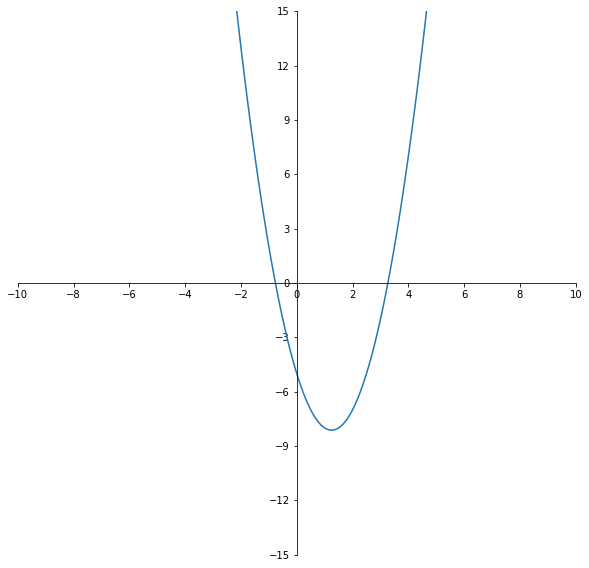

In [58]:
coeffs = list(range(-5, 6, 1))
coeffs.remove(0)
a = choice(coeffs)
b = randint(-5, 5)
c = randint(-5, 5)
x = np.linspace(-5, 5, 100)
f = lambda x, a, b, c: a*x**2+b*x+c

eq_str = fr"$y={a}x^2+{b}x+{c}$"
print(eq_str)

plt.rcParams["figure.figsize"] = (10, 10)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
axes_map = {"left": "zero",
            "bottom":"zero",
            "right":"none",
            "top": "none"
}

ax.spines['left'].set_position(axes_map["left"])
ax.spines['bottom'].set_position(axes_map["bottom"])
ax.spines['right'].set_color(axes_map["right"])
ax.spines['top'].set_color(axes_map["top"])
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
xmin, xmax = (-10, 10)
ymin, ymax = (-15, 15)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)


plt.plot(x, f(x, a, b, c))
plt.show()

In [63]:
f = lambda x: a*x**2+b*x+c
find_h = lambda a, b: -b/(2*a)
find_k = lambda h: f(h)

h = find_h(a, b)
print(h, find_k(h))

def generate_eq_str(coeffs):
    return r"$y={a}x^2+{b}x+{c}$".format(**coeffs)
    
def parabola(x=np.linspace(-5, 5, 100)):
    a = randint(-5, 5)
    b = randint(-5, 5)
    c = b = randint(-5, 5)
    
    y = a*x**2 + b*x + c
    return (
        {"a":a,
         "b":b,
         "c":c},

        {"x":x,
         "y":y
        }
    )


1.25 -8.125


In [ ]:
def create_plot_axes():
    plt.rcParams["figure.figsize"] = (10, 10)
    # rc("text", usetex=True)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    axes_map = {"left": "zero",
                "bottom":"zero",
                "right":"none",
                "top": "none"
    }

    ax.spines['left'].set_position(axes_map["left"])
    ax.spines['bottom'].set_position(axes_map["bottom"])
    ax.spines['right'].set_color(axes_map["right"])
    ax.spines['top'].set_color(axes_map["top"])
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    xmin, xmax = (-10, 10)
    ymin, ymax = (xmin, xmax)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

In [16]:
list({"a":a,
"b":b,
"c":c}.values())

[-3, 2, 2]

In [53]:
f = lambda x: a*x**2+b*x+c

In [54]:
f(x)

array([-2.50000000e+01, -2.40001020e+01, -2.30206101e+01, -2.20615243e+01,
       -2.11228446e+01, -2.02045710e+01, -1.93067034e+01, -1.84292419e+01,
       -1.75721865e+01, -1.67355372e+01, -1.59192939e+01, -1.51234568e+01,
       -1.43480257e+01, -1.35930007e+01, -1.28583818e+01, -1.21441690e+01,
       -1.14503622e+01, -1.07769615e+01, -1.01239669e+01, -9.49137843e+00,
       -8.87919600e+00, -8.28741965e+00, -7.71604938e+00, -7.16508520e+00,
       -6.63452709e+00, -6.12437506e+00, -5.63462912e+00, -5.16528926e+00,
       -4.71635547e+00, -4.28782777e+00, -3.87970615e+00, -3.49199061e+00,
       -3.12468115e+00, -2.77777778e+00, -2.45128048e+00, -2.14518927e+00,
       -1.85950413e+00, -1.59422508e+00, -1.34935211e+00, -1.12488522e+00,
       -9.20824406e-01, -7.37169677e-01, -5.73921028e-01, -4.31078461e-01,
       -3.08641975e-01, -2.06611570e-01, -1.24987246e-01, -6.37690032e-02,
       -2.29568411e-02, -2.55076013e-03, -2.55076013e-03, -2.29568411e-02,
       -6.37690032e-02, -

In [71]:
def generate_coeffs():
    coeffs = list(range(-5, 6, 1))
    coeffs.remove(0)

    a = choice(coeffs)
    b = randint(-5, 5)
    c = randint(-5, 5)
    
    if b==c and b==min(coeffs):
        c+=1
    if b==c and b==max(coeffs):
        c-=1
        
    return {"a":a,
         "b":b,
         "c":c}

In [77]:
coeffs = generate_coeffs()
coeffs

{'a': 5, 'b': 1, 'c': -2}

{'a': -4, 'b': 1, 'c': -3}